In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
data = pd.read_csv('/content/drive/My Drive/data/halong_quality.csv', index_col='date')

In [19]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,6,6,45,3,500,NaN
3/2/2019,59,55,1,6,500,NaN
3/3/2019,43,28,5,9,500,NaN
3/4/2019,27,3,4,16,500,NaN
3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...
5/28/2024,64,32,48,9,500,NaN
5/29/2024,47,20,23,8,500,NaN
5/30/2024,40,6,49,9,500,NaN


In [27]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [7]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/60
144/144 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0194
Epoch 2/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0195
Epoch 3/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0199
Epoch 4/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0200
Epoch 5/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0194
Epoch 6/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0186
Epoch 7/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0189
Epoch 8/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0197
Epoch 9/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0187
Epoch 10/60
144/144 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0177

In [28]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.37341772 0.26582278 0.22151899 0.0443038  0.20253165]
Predict value:
6/6 [==============================] - 0s 3ms/step
[[ 0.1860992 ]
 [ 0.49405515]
 [ 0.36084086]
 [ 0.46970007]
 [ 0.5048142 ]
 [ 0.4580843 ]
 [ 0.6183746 ]
 [ 0.27000234]
 [ 0.32570407]
 [ 0.26065186]
 [ 0.28525454]
 [ 0.4145625 ]
 [ 0.3274671 ]
 [ 0.19853872]
 [ 0.39756152]
 [ 0.3707851 ]
 [ 0.29641798]
 [ 0.24277374]
 [ 0.25809482]
 [ 0.22150522]
 [ 0.32883105]
 [ 0.1968081 ]
 [ 0.1860266 ]
 [ 0.06700301]
 [ 0.15664172]
 [ 0.18072793]
 [ 0.19127658]
 [ 0.22913587]
 [ 0.23753574]
 [ 0.4388301 ]
 [ 0.5107905 ]
 [ 0.2373294 ]
 [ 0.3087858 ]
 [ 0.15996572]
 [ 0.30078176]
 [ 0.59310675]
 [ 0.49079093]
 [ 0.2972306 ]
 [ 0.355106  ]
 [ 0.24732557]
 [ 0.21494964]
 [ 0.09126817]
 [ 0.052274  ]
 [ 0.38729107]
 [ 0.40155914]
 [ 0.22332096]
 [ 0.2915439 ]
 [ 0.1795949 ]
 [ 0.25721705]
 [ 0.31802565]
 [ 0.23868066]
 [ 0.21614376]
 [ 0.25161895]
 [ 0.21892014]
 [ 0.1301429 ]
 [ 0.1620833 ]
 [ 0.17581482]
 [ 0.185

In [29]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 1ms/step


0.202208942481071

In [34]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.06655999686467885
MAPE: 10240150280155.871
MAE: 0.044797147637193266


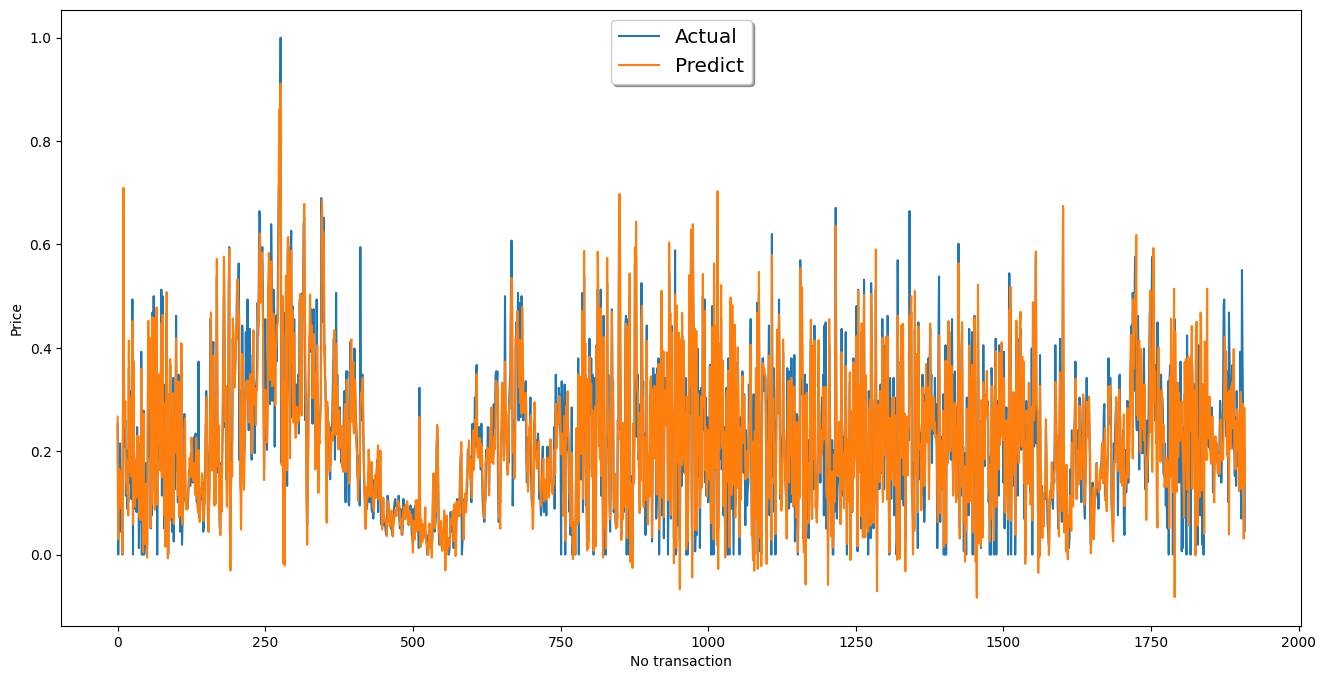

In [31]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [13]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 20ms/step
Next 90 days PM2.5 predictions: [26.400167 21.619013 35.2769   53.650288 57.17926  71.20008  77.90421
 72.03286  61.702736 53.70071  52.83842  58.186123 53.365665 30.943827
 19.83158  32.615097 40.60919  35.573578 48.90027  62.754383 49.64335
 40.1316   42.693356 43.701817 43.636482 39.90248  33.962116 29.789265
 32.287643 28.352198 25.443436 27.028929 29.450891 33.86148  33.07518
 26.961895 27.715874 28.7132   27.487719 30.618338 28.946081 26.793444
 30.168713 28.430674 27.932735 27.396133 26.65308  28.465677 30.303082
 29.706284 31.500662 32.058434 29.889877 28.437403 26.730888 27.20078
 30.167833 30.267963 29.941141 30.024416 29.802008 28.298538 27.459457
 27.032364 27.972647 29.582178 31.026066 31.020947 31.713715 30.481993
 27.482279 25.931038 27.28851  29.477446 31.594738 31.425976 31.167486
 31.492111 29.687525 27.057281 26.609398 27.323338 29.972609 30.939457
 30.859446 31.337782 31.418882 28.875916 26.294575 25.698345]


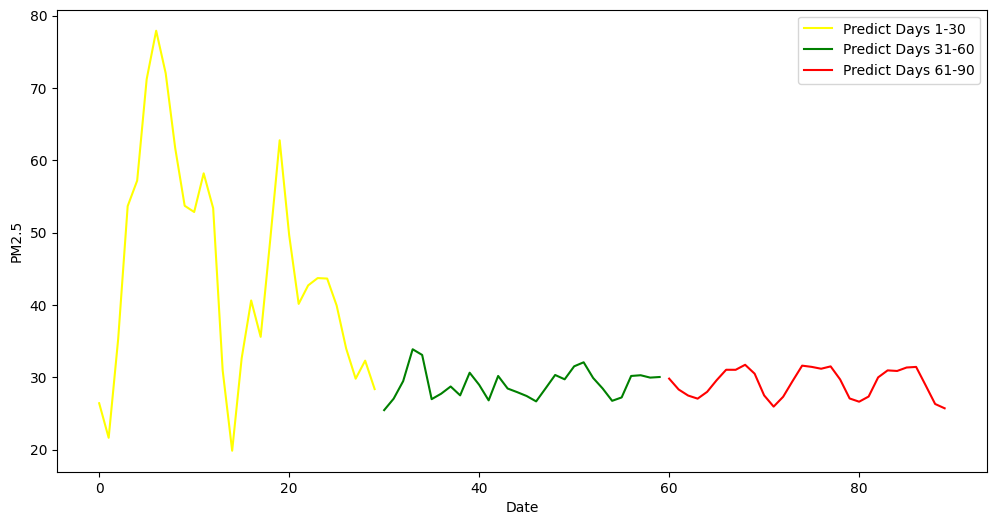

In [17]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()